<a href="https://colab.research.google.com/github/Bipolar-Ochka/Test_stand/blob/main/test_stand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –ü—Ä–æ–≥—Ä–∞–º–º–∞

## 1. –ò–º–ø–æ—Ä—Ç—ã


In [ ]:
import numpy as np
import numpy.ma as ma
from scipy.linalg import hadamard
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
from collections import Counter
import random
import string as string_module




---



## 2. –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

### 2.1. –¢–µ–∫—Å—Ç –≤ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –∫–æ–¥–∏—Ä–æ–≤–∫–µ -> –º–∞—Å—Å–∏–≤ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ —Ç–∏–ø–∞

–ü–æ —É–º–æ–ª—á–∞–Ω–∏—é: –∫–æ–¥–∏—Ä–æ–≤–∫–∞ - **windows-1251**, —Ç–∏–ø –≤—ã—Ö–æ–¥–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö - **bool**. –ü–æ—Å–ª–µ–¥–Ω–µ–µ –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –º–∞—Å–∫–∏—Ä–æ–≤–∞–Ω–∏—è –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è.

In [ ]:
def text2bin(text, encoding = 'windows-1251'):
    res = []
    for num in text.encode(encoding):
        res.extend(i for i in map(int, '{:08b}'.format(num)))
    
    return res

def gettextarray(text, encoding = 'windows-1251', type = 'bool'):
    result = np.array(text2bin(text, encoding), dtype=type)
    return (result, result.shape[0])

### 2.2. –ë–∏—Ç–æ–≤—ã–µ –æ–ø–µ—Ä–∞—Ü–∏–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –Ω—É–º–µ—Ä–∞—Ü–∏–π –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

In [ ]:
#—á–∏—Å–ª–æ -> –∫–æ–¥ –≥—Ä–µ—è
def b2gr(n):
    return n ^ (n >> 1)

#–∫–æ–¥ –≥—Ä–µ—è -> —á–∏—Å–ª–æ
def gr2b(n):
    temp = n
    n >>= 1
    while n != 0:
        temp ^= n
        n >>= 1
        
    return temp

#–±–∏—Ç—ã –≤ –æ–±—Ä–∞—Ç–Ω–æ–º –ø–æ—Ä—è–¥–∫–µ
def reverse(n, bits):
    b = format(n, 'b')
    b = b.rjust(bits, '0')
    return int(b[::-1],2)

#–Ω—É–º–µ—Ä–∞—Ü–∏—è –ø–æ –∞–¥–∞–º–∞—Ä—É -> –ø–æ —É–æ–ª—à—É
def had2wal(val, bits):
    r = reverse(val, bits)
    return gr2b(r)

#–Ω—É–º–µ—Ä–∞—Ü–∏—è –ø–æ —É–æ–ª—à—É -> –ø–æ –ø—ç–ª–∏
def wal2pal(val):
    return b2gr(val)

### 2.3. –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∑–∞–¥–∞–Ω–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é - get_ort_matrix. –ü–µ—Ä–≤—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä - –¥–ª–∏–Ω–∞ –º–∞—Å—Å–∏–≤–∞ –±–∏—Ç–æ–≤ –∫–æ–¥–∏—Ä—É–µ–º–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è, –≤—Ç–æ—Ä–æ–π - —Ç–∏–ø –Ω—É–º–µ—Ä–∞—Ü–∏–∏: 'had' - –ø–æ –ê–¥–∞–º–∞—Ä—É, 'wal'  - –ø–æ –£–æ–ª—à—É, –æ—Å—Ç–∞–ª—å–Ω–æ–µ - –ø–æ –ü—ç–ª–∏. –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –º–∞—Ç—Ä–∏—Ü—É –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ä–∞–∑–º–µ—Ä–∞ $2^{‚åà\log_2 N‚åâ}$ , –≥–¥–µ N - –¥–ª–∏–Ω–∞ –º–∞—Å—Å–∏–≤–∞ –±–∏—Ç–æ–≤ —Å–æ–æ–±—â–µ–Ω–∏—è

In [ ]:
def get_hadamar(size):
    return hadamard(size)

def get_walsh(size):
    bits = int(np.log2(size))
    had_mat = get_hadamar(size)
    map_wal = {i:had2wal(i, bits) for i in range(size)}
    w = np.zeros((size,size))
    for had, wal in map_wal.items():
        w[wal] = had_mat[had]
    return w

def get_paley(size):
    walsh = get_walsh(size)
    map_pal = {i:wal2pal(i) for i in range(size)}
    p = np.zeros((size,size))
    for wal, pal in map_pal.items():
        p[pal] = walsh[wal]
    return p

def get_ort_matrix(msg_len, type='pal'):
    size = np.ceil(np.log2(msg_len))
    total_size = int(2**size)

    if type == 'had':
        return (total_size, get_hadamar(total_size))
    elif type == 'wal':
        return (total_size, get_walsh(total_size))
    else:
        return (total_size, get_paley(total_size))

def get_full_ort_matrix(size, type = 'pal'):
    if type == 'had':
        return get_hadamar(size)
    elif type == 'wal':
        return  get_walsh(size)
    else:
        return get_paley(size)

def get_part_ort_matrix(size, msg_len, shift_f, shift_e, type = 'pal'):
    if type == 'had':
        return get_hadamar(size)[shift_f : msg_len+shift_f, shift_e : msg_len + shift_e]
    elif type == 'wal':
        return  get_walsh(size)[shift_f : msg_len+shift_f, shift_e : msg_len + shift_e]
    else:
        return get_paley(size)[shift_f : msg_len+shift_f, shift_e : msg_len + shift_e]

### 2.4. –ó–∞–¥–∞–Ω–∏–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è i-–º—É –±–∏—Ç—É –º–∞—Å—Å–∏–≤–∞ —Å–æ–æ–±—â–µ–Ω–∏–π -> —Å—Ç—Ä–æ–∫–∏ –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

–í—Ö–æ–¥ - –¥–ª–∏–Ω–∞ –º–∞—Å—Å–∏–≤–∞ –±–∏—Ç–æ–≤ —Å–æ–æ–±—â–µ–Ω–∏—è. –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é - i-—ã–π –±–∏—Ç —Å–æ–æ–±—â–µ–Ω–∏—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç i-–æ–π —Å—Ç—Ä–æ–∫–µ –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

In [ ]:
def get_default_map(msg_len):
    return np.array([i for i in range(msg_len)], dtype='int')

### 2.5. –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ –º–∞—Å—Å–∏–≤—É –±–∏—Ç–æ–≤ —Å–æ–æ–±—â–µ–Ω–∏—è

–ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å - get_sum_function_for_message. –ü–∞—Ä–∞–º–µ—Ç—Ä—ã - –ø–æ–ª–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è, –º–∞—Å—Å–∏–≤ –±–∏—Ç–æ–≤, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –∏–∑ [2.4.](https://colab.research.google.com/drive/1i-hgvaiHeT_Z5MM7c-SuDrc3TxKRR-c2#scrollTo=fV20kWHF2kOH&line=1&uniqifier=1), —Å–¥–≤–∏–≥ –ø–æ —Å—Ç—Ä–æ–∫–∞–º, —Å–¥–≤–∏–≥ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º

In [ ]:
def get_walsh_part(arr, msg_len, offset_fun = 0, offset_elem = 0):
    np_arr = np.array(arr, dtype='int')
    
    if(np_arr.ndim != 2):
        raise ValueError('Not 2 dim matrix')

    if(np_arr.shape[0] < msg_len):
        raise ValueError('Not enough functions or function elements')

    return arr[offset_fun : msg_len+offset_fun, offset_elem : msg_len + offset_elem]

def get_mapped_walsh(part_walsh, mapping):
    if(part_walsh.shape[0] < len(mapping)):
        raise ValueError('Matrix have lesser function than requested')
    return np.take(part_walsh, mapping, axis=0)

def get_walsh_masked_for_message(w_matrix, msg_bits, w_fun_mapping , offset_fun = 0, offset_elem = 0):
    msg_len = len(msg_bits)
    full_part_matrix = get_walsh_part(w_matrix, msg_len, offset_fun, offset_elem)
    part_matrix = get_mapped_walsh(full_part_matrix, w_fun_mapping)
    mask = np.array(msg_bits, dtype='bool')
    return full_part_matrix, part_matrix[mask, :]

def get_sum_function_for_message(w_matrix, msg_bits, w_fun_mapping , offset_fun = 0, offset_elem = 0):
    full_part_matrix, mtrx = get_walsh_masked_for_message(w_matrix, msg_bits, w_fun_mapping , offset_fun, offset_elem)
    return (full_part_matrix, np.sum(mtrx, axis=0))

### 2.6. –°—É–º–º–∞—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª -> –ú–∞—Å—Å–∏–≤ –±–∏—Ç–æ–≤ —Å–æ–æ–±—â–µ–Ω–∏—è

In [ ]:
def decode_sum_fun(part_matrix, sum_fun):
    return np.matmul(part_matrix, sum_fun) / part_matrix.shape[1]

### 2.7. –ú–æ–¥–µ–ª—å –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [ ]:
class Result():

    def __init__(self, b_m_l, ort_m_s, s_f, s_e, b_m, d_m, m_type, sum_sig):
        #–¥–ª–∏–Ω–∞ –º–∞—Å—Å–∏–≤–∞ –±–∏—Ç–æ–≤ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è
        self.binary_message_len = b_m_l

        #—Ä–∞–∑–º–µ—Ä –º–∞—Ç—Ä–∏—Ü—ã –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è     
        self.ort_matrix_size = ort_m_s

        #—Å–¥–≤–∏–≥ –ø–æ —Å—Ç—Ä–æ–∫–µ
        self.shift_function = s_f

        #—Å–¥–≤–∏–≥ –ø–æ —Å—Ç–æ–ª–±—Ü—É
        self.shift_element = s_e

        #–º–∞—Å—Å–∏–≤ –±–∏—Ç–æ–≤ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è
        self.binary_message = b_m

        #–¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Å–æ–æ–±—â–µ–Ω–∏–µ
        self.decoded_message = d_m

        #—Ç–∏–ø –Ω—É–º–µ—Ä–∞—Ü–∏–∏ –º–∞—Ç—Ä–∏—Ü—ã –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
        self.matrix_type = m_type

        #—Å—É–º–º–∞—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª
        self.summary_signal = sum_sig

    def get_full_matrix(self):
        return get_full_ort_matrix(self.ort_matrix_size, self.matrix_type)

    def get_part_matrix(self):
        return get_part_ort_matrix(self.ort_matrix_size, self.binary_message_len, self.shift_function, self.shift_element, self.matrix_type)

    def get_max_deltas(self):
        masked_arr_1 = ma.masked_where(self.binary_message != 1, self.binary_message)
        max_abs_diff_1 = (np.absolute(masked_arr_1 - self.decoded_message)).max()

        masked_arr_0 = ma.masked_where(self.binary_message != 0, self.binary_message)
        max_abs_diff_0 = (np.absolute(masked_arr_0 - self.decoded_message)).max()
        return (max_abs_diff_0, max_abs_diff_1)


class Result_full():

      def __init__(self, result_short: Result, bits_per_level, level_map, full_encoded_message):

          #Result –∫–∞–∫ –≤—ã—à–µ
          self.base_result = result_short

          #–±–∏—Ç–æ–≤ –Ω–∞ –æ–¥–∏–Ω –æ—Ç—Å—á–µ—Ç —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞
          self.bits_per_signal_level = bits_per_level

          #—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —É—Ä–æ–≤–µ–Ω—å —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ -> –¥–≤–æ–∏—á–Ω—ã–π –∫–æ–¥
          self.level_2_binary_map = level_map

          #–ø–æ–ª–Ω–æ—Å—Ç—å—é –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Å–æ–æ–±—â–µ–Ω–∏–µ
          self.full_encoded_message = full_encoded_message


### 2.8. –ú–∞—Å—Å–∏–≤ –±–∏—Ç–æ–≤ —Å–æ–æ–±—â–µ–Ω–∏—è -> —Å—É–º–º–∞—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª -> –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –º–∞—Å—Å–∏–≤ –±–∏—Ç–æ–≤

In [ ]:
def encoder_decoder_short(binary_array, binary_msg_len, full_orthogonal_matrix, offset_f, offset_e):

    #—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –±–∏—Ç—É —Å–æ–æ–±—â–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ —É–æ–ª—à–∞ 
    #i-—ã–π –∏–Ω–¥–µ–∫—Å –º–∞—Å—Å–∏–≤–∞ = i-—ã–π –±–∏—Ç —Å–æ–æ–±—â–µ–Ω–∏—è -> walsh_map[i] - –Ω–æ–º–µ—Ä —Ñ—É–Ω–∫—Ü–∏–∏ —É–æ–ª—à–∞ –¥–ª—è i-–≥–æ –±–∏—Ç–∞
    walsh_map = get_default_map(binary_msg_len)

    #—Å—É–º–º–∞ —Ñ—É–Ω–∫—Ü–∏–π —É–æ–ª—à–∞ –¥–ª—è –ø–æ–¥–º–∞—Ç—Ä–∏—Ü—ã
    part_matrix, sum_fun = get_sum_function_for_message(full_orthogonal_matrix, binary_array, walsh_map, offset_f, offset_e)

    #–≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏–µ –¥–≤–æ–∏—á–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞
    decoded_binary_arr = np.matmul(part_matrix, sum_fun) / part_matrix.shape[1]

    return decoded_binary_arr, sum_fun

### 2.9. –£—Ä–æ–≤–µ–Ω—å —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ -> –¥–≤–æ–∏—á–Ω–∞—è –∫–æ–º–±–∏–Ω–∞—Ü–∏—è

In [ ]:
def get_level_binary_map(min_val, max_val):
    if(min_val > max_val):
        raise ValueError('min_val > max_val')

    bit_length =  math.ceil(math.log2(max_val - min_val + 1))
    format_str = f'{{:0{bit_length}b}}'
    return (bit_length, {val: format_str.format(i) for i, val in  enumerate(range(min_val, max_val+1))})

def sum_fun_to_binary_array(sum_fun, mapping):
    return [mapping[key] for key in sum_fun]

def sum_fun_to_binary_string(sum_fun, mapping):
    return ''.join([str(i) for i in sum_fun_to_binary_array(sum_fun, mapping)])

def array_to_binary_string(array):
    return ''.join([str(i) for i in array])

### 2.10. –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä —Å–ª—É—á–∞–π–Ω—ã—Ö —Å—Ç—Ä–æ–∫

In [ ]:
def random_string(letter_count, digit_count):
    str1 = ''.join((random.choice(string_module.ascii_letters) for x in range(letter_count))) 
    str1 += ''.join((random.choice(string_module.digits) for x in range(digit_count))) 
    
    sam_list = list(str1) # it converts the string to list. 
    random.shuffle(sam_list) # It uses a random.shuffle() function to shuffle the string. 
    final_string = ''.join(sam_list) 
    return final_string 

def get_list_of_random_strings(numberof_strings, letter_count, digit_count):
    return [random_string(letter_count, digit_count) for i in range(numberof_strings)]

## 3. –§—É–Ω–∫—Ü–∏–∏ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è/–¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è

### 3.1. –ú–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ–º–∞—è –æ—Ü–µ–Ω–∫–∞ 

–ò—â–µ–º —Ç–∞–∫–æ–π –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –º–∞—Å—Å–∏–≤ –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ $‚àë_{i=0}^{N} (V_i - D_i)^2 ‚Üí min$ , –≥–¥–µ ùëÅ - —á–∏—Å–ª–æ –±–∏—Ç–æ–≤ —Å–æ–æ–±—â–µ–Ω–∏—è, ùëâ - –º–∞—Å—Å–∏–≤ –±–∏—Ç–æ–≤ –≤—Ö–æ–¥–Ω–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è, ùê∑ - –º–∞—Å—Å–∏–≤ –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è

In [ ]:
def score(input_arr, output_arr):
    return (np.square(input_arr - output_arr)).sum()

### 3.2. –£–∫–æ—Ä–æ—á–µ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è/–¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è (–±–µ–∑ –ø–µ—Ä–µ–≤–æ–¥–∞ —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –≤ –Ω–∞–±–æ—Ä –¥–≤–æ–∏—á–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π)

#### 3.2.1. –§—É–Ω–∫—Ü–∏—è –ø–æ–∏—Å–∫–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ–¥–º–∞—Å—Å–∏–≤–∞ –≤ –ø–æ–ª–Ω–æ–π –æ—Ä—Ç–æ–≥–æ–Ω–∞–ª—å–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –≤ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –Ω—É–º–µ—Ä–∞—Ü–∏–∏ –∏ –∫–æ–¥–∏—Ä–æ–≤–∫–µ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ –¥–ª—è —Å–æ–æ–±—â–µ–Ω–∏—è –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω–æ–π –¥–ª–∏–Ω—ã

–ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç—Å—è –∫–æ–¥–∏—Ä–æ–≤–∫–∞ –≤–ø—Ä–∏–Ω—Ü–∏–ø–µ –ª—é–±–∞—è 8-–±–∏—Ç–Ω–∞—è –∫–æ–¥–∏—Ä–æ–≤–∫–∞, –ø–æ–∫–∞ —á—Ç–æ.
'had' - –Ω—É–º–µ—Ä–∞—Ü–∏—è –ê–¥–∞–º–∞—Ä–∞, 'wal' - –£–æ–ª—à–∞, 'pal' –∏ –ª—é–±–æ–µ –∏ –¥—Ä—É–≥–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ - –ü—ç–ª–∏

In [ ]:
def short_get_optimal_function(string, matrix_type = 'pal', encoding = 'windows-1251'):

    #—Ç–µ–∫—Å—Ç –≤ –≤–∏–¥–µ –º–∞—Å—Å–∏–≤–∞ –±–∏—Ç–æ–≤ –≤ –∫–æ–¥–∏—Ä–æ–≤–∫–µ windows-1251
    binary_array, binary_msg_len = gettextarray(string, encoding)
    output = np.array(binary_array, dtype='int')

    #–ø–æ–ª–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —Ñ—É–Ω–∫—Ü–∏–π —É–æ–ª—à–∞ - —Ä–∞–∑–º–µ—Ä ort_matrix_size = 2 ^ (ceil(log2(binary_msg_len)))
    ort_matrix_size, full_orthogonal_matrix = get_ort_matrix(binary_msg_len, matrix_type)

    min_f, min_e = (0, 0)
    current_min = 99999
    min_decoded = np.zeros((binary_msg_len,))
    min_sum_signal = np.zeros((binary_msg_len,))

    for shift_f in range(0, ort_matrix_size - binary_msg_len + 1):
        for shift_e in range(0, ort_matrix_size - binary_msg_len + 1):
             decoded, sum_signal = encoder_decoder_short(binary_array, binary_msg_len, full_orthogonal_matrix, shift_f, shift_e)
             score_val = score(binary_array, decoded)

             if score_val < current_min:
                current_min = score_val
                min_f = shift_f
                min_e = shift_e
                min_decoded = decoded
                min_sum_signal = sum_signal

    result = Result(binary_msg_len, ort_matrix_size, min_f, min_e, output, min_decoded, matrix_type, min_sum_signal)

    return result

#### 3.2.2. –ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—Ä–æ—à–ª–æ–º—É –ø—É–Ω–∫—Ç—É, —Ç–æ–ª—å–∫–æ –≤–º–µ—Å—Ç–æ –ø–æ–∏—Å–∫–∞ - —Å–¥–≤–∏–≥ –∑–∞–¥–∞–µ—Ç—Å—è –≤—Ä—É—á–Ω—É—é —á–µ—Ä–µ–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ñ—É–Ω–∫—Ü–∏–∏

In [ ]:
def short_get_selected_function(string, shift_f, shift_e, matrix_type = 'pal', encoding = 'windows-1251'):

    #—Ç–µ–∫—Å—Ç –≤ –≤–∏–¥–µ –º–∞—Å—Å–∏–≤–∞ –±–∏—Ç–æ–≤ –≤ –∫–æ–¥–∏—Ä–æ–≤–∫–µ windows-1251
    binary_array, binary_msg_len = gettextarray(string, encoding)
    output = np.array(binary_array, dtype='int')

    #–ø–æ–ª–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —Ñ—É–Ω–∫—Ü–∏–π —É–æ–ª—à–∞ - —Ä–∞–∑–º–µ—Ä ort_matrix_size = 2 ^ (ceil(log2(binary_msg_len)))
    ort_matrix_size, full_orthogonal_matrix = get_ort_matrix(binary_msg_len, matrix_type)

    decoded, sum_signal = encoder_decoder_short(binary_array, binary_msg_len, full_orthogonal_matrix, shift_f, shift_e)

    result = Result(binary_msg_len, ort_matrix_size, shift_f, shift_e, output, decoded, matrix_type, sum_signal)

    return result

### 3.3. –ü–æ–ª–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è/–¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è (—Å —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ–º –∏—Ç–æ–≥–æ–≤–æ–≥–æ –¥–≤–æ–∏—á–Ω–æ–≥–æ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Å–æ–æ–±—â–µ–Ω–∏—è)

#### 3.3.1. –° –ø–æ–∏—Å–∫–æ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ–¥–º–∞—Å—Å–∏–≤–∞.

In [ ]:
def full_get_optimal_function(string, matrix_type = 'pal', encoding = 'windows-1251'):
    short_result = short_get_optimal_function(string, matrix_type, encoding)

    #—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —É—Ä–æ–≤–µ–Ω—å —Å—É–º–º–∞—Ä–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ -> –¥–≤–æ–∏—á–Ω—ã–π –∫–æ–¥
    bits_per_level, level_map = get_level_binary_map(short_result.summary_signal.min(), summary_signal.max())

    #—Å—É–º–º–∞—Ä–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è -> –¥–≤–æ–∏—á–Ω—ã–π –∫–æ–¥ 
    binary_encoded_array = sum_fun_to_binary_array(short_result.summary_signal, level_map)

    return Result_full(short_result, bits_per_level, level_map, binary_encoded_array)


#### 3.3.2. –ë–µ–∑ –ø–æ–∏—Å–∫–∞

In [ ]:
def full_get_selected_function(string, shift_f, shift_e, matrix_type = 'pal', encoding = 'windows-1251'):
    short_result = short_get_selected_function(string, shift_f, shift_e, matrix_type, encoding)

    #—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —É—Ä–æ–≤–µ–Ω—å —Å—É–º–º–∞—Ä–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ -> –¥–≤–æ–∏—á–Ω—ã–π –∫–æ–¥
    bits_per_level, level_map = get_level_binary_map(short_result.summary_signal.min(), summary_signal.max())

    #—Å—É–º–º–∞—Ä–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è -> –¥–≤–æ–∏—á–Ω—ã–π –∫–æ–¥ 
    binary_encoded_array = sum_fun_to_binary_array(short_result.summary_signal, level_map)

    return Result_full(short_result, bits_per_level, level_map, binary_encoded_array)


## 4. –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

### 4.1. –ì—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

#### 4.1.1. –î–ª—è –æ–¥–Ω–æ–≥–æ –≤—ã—Ö–æ–¥–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞

In [ ]:
def plot_result(result: Result):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,6))
    mes_len = result.binary_message_len
    p_m = result.get_part_matrix()
    ax[0].imshow(p_m, interpolation='none', cmap='binary')
    ax[0].set(xlabel = '–≠–ª–µ–º–µ–Ω—Ç —Ñ—É–Ω–∫—Ü–∏–∏', ylabel = '–ù–æ–º–µ—Ä —Ñ—É–Ω–∫—Ü–∏–∏', title = f'–ò—Å—Ö–æ–¥–Ω—ã–π —Ç–µ–∫—Å—Ç = {mes_len} –±–∏—Ç–æ–≤.\ndelta = {result.ort_matrix_size - mes_len}\n –ù—É–º–µ—Ä–∞—Ü–∏—è {get_matr_name(result.matrix_type)}')
    plt.setp(ax[0], xticks = [i for i in range(0, p_m.shape[0])], xticklabels = [i for i in range(1, p_m.shape[0]+1)], yticks = [i for i in range(0, p_m.shape[0])], yticklabels = [i for i in range(1, p_m.shape[0]+1)])
    plt.setp(ax[0].get_xticklabels(), fontsize=6, rotation=90)
    plt.setp(ax[0].get_yticklabels(), fontsize=6)

    full_m = result.get_full_matrix()
    ax[1].imshow(full_m, interpolation='none', cmap='binary')
    ax[1].set(xlabel = '–≠–ª–µ–º–µ–Ω—Ç —Ñ—É–Ω–∫—Ü–∏–∏', ylabel = '–ù–æ–º–µ—Ä —Ñ—É–Ω–∫—Ü–∏–∏', title = f'–°–¥–≤–∏–≥ –ø–æ —Ñ—É–Ω–∫—Ü–∏—è–º = {result.shift_function}\n–ü–æ —ç–ª–µ–º–µ–Ω—Ç–∞–º = {result.shift_element}')
    plt.setp(ax[1], xticks = [i for i in range(0, result.ort_matrix_size)], xticklabels = [i for i in range(1, result.ort_matrix_size+1)], yticks = [i for i in range(0, result.ort_matrix_size)], yticklabels = [i for i in range(1, result.ort_matrix_size+1)])
    plt.setp(ax[1].get_xticklabels(), fontsize=6, rotation=90)
    plt.setp(ax[1].get_yticklabels(), fontsize=6)
    cb = Rectangle((-.4 + result.shift_element,-.4 + result.shift_function),p_m.shape[0],p_m.shape[1],
                            edgecolor='red',
                            facecolor='none',
                            lw=1)
    ax[1].add_patch(cb)

    ax[2].plot(result.binary_message, 'r+')
    ax[2].plot(result.decoded_message, 'b.')

    ax[2].plot(([i for i in range(result.binary_message_len)], [i for i in range(result.binary_message_len)]), (result.binary_message, result.decoded_message), c='black')

    max_abs_diff_0, max_abs_diff_1 = result.get_max_deltas()

    ax[2].set(title = f'Max delta for 1 = {max_abs_diff_1:.3f}, \n max delta for 0 = {max_abs_diff_0:.3f}\n –û—Ü–µ–Ω–∫–∞ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–π = {score(result.binary_message, result.decoded_message)}')
    
    plt.tight_layout()
    plt.show()

#### 4.1.2. –î–ª—è —Å–ø–∏—Å–∫–∞ –æ–±—ä–µ–∫—Ç–æ–≤

In [ ]:
def plot_list_result(results):
    fig, ax = plt.subplots(nrows=len(results), ncols=3, figsize = (16,6*len(results)))
    for i, result in enumerate(results):
      mes_len = result.binary_message_len
      p_m = result.get_part_matrix()
      ax[i,0].imshow(p_m, interpolation='none', cmap='binary')
      ax[i,0].set(xlabel = '–≠–ª–µ–º–µ–Ω—Ç —Ñ—É–Ω–∫—Ü–∏–∏', ylabel = '–ù–æ–º–µ—Ä —Ñ—É–Ω–∫—Ü–∏–∏', title = f'–ò—Å—Ö–æ–¥–Ω—ã–π —Ç–µ–∫—Å—Ç = {mes_len} –±–∏—Ç–æ–≤.\ndelta = {result.ort_matrix_size - mes_len}\n–ù—É–º–µ—Ä–∞—Ü–∏—è {get_matr_name(result.matrix_type)}')
      plt.setp(ax[i,0], xticks = [i for i in range(0, p_m.shape[0])], xticklabels = [i for i in range(1, p_m.shape[0]+1)], yticks = [i for i in range(0, p_m.shape[0])], yticklabels = [i for i in range(1, p_m.shape[0]+1)])
      plt.setp(ax[i,0].get_xticklabels(), fontsize=6, rotation=90)
      plt.setp(ax[i,0].get_yticklabels(), fontsize=6)

      full_m = result.get_full_matrix()
      ax[i,1].imshow(full_m, interpolation='none', cmap='binary')
      ax[i,1].set(xlabel = '–≠–ª–µ–º–µ–Ω—Ç —Ñ—É–Ω–∫—Ü–∏–∏', ylabel = '–ù–æ–º–µ—Ä —Ñ—É–Ω–∫—Ü–∏–∏', title = f'–°–¥–≤–∏–≥ –ø–æ —Ñ—É–Ω–∫—Ü–∏—è–º = {result.shift_function}\n–ü–æ —ç–ª–µ–º–µ–Ω—Ç–∞–º = {result.shift_element}')
      plt.setp(ax[i,1], xticks = [i for i in range(0, result.ort_matrix_size)], xticklabels = [i for i in range(1, result.ort_matrix_size+1)], yticks = [i for i in range(0, result.ort_matrix_size)], yticklabels = [i for i in range(1, result.ort_matrix_size+1)])
      plt.setp(ax[i,1].get_xticklabels(), fontsize=6, rotation=90)
      plt.setp(ax[i,1].get_yticklabels(), fontsize=6)
      cb = Rectangle((-.4 + result.shift_element,-.4 + result.shift_function),p_m.shape[0],p_m.shape[1],
                              edgecolor='red',
                              facecolor='none',
                              lw=1)
      ax[i,1].add_patch(cb)

      ax[i,2].plot(result.binary_message, 'r+')
      ax[i,2].plot(result.decoded_message, 'b.')

      ax[i,2].plot(([i for i in range(result.binary_message_len)], [i for i in range(result.binary_message_len)]), (result.binary_message, result.decoded_message), c='black')

      max_abs_diff_0, max_abs_diff_1 = result.get_max_deltas()

      ax[i,2].set(title = f'Max delta for 1 = {max_abs_diff_1:.3f}, \n max delta for 0 = {max_abs_diff_0:.3f}\n –û—Ü–µ–Ω–∫–∞ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–π = {score(result.binary_message, result.decoded_message)}')
    
    plt.tight_layout()
    plt.show()

#### 4.1.3. –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∫–∞—Ä—Ç—ã —Å–¥–≤–∏–≥–æ–≤

In [ ]:
def plot_shift_map(res_list : list[Result]):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
    point_list = [res.shift_element,res.shift_function for res in res_list]
    x = [x for x,y in point_list]
    y = [y for x,y in point_list]
    D = Counter(point_list)
    ax[0].bar([f'R{x}:C{y}' for x,y in D.keys()], list(D.values()), align='center')

    ax[1].plot([score(res.binary_message, res.decoded_message) for res in res_list])

    plt.show()


### 4.2. –¢–µ–∫—Å—Ç–æ–≤—ã–π –≤—ã–≤–æ–¥

In [ ]:
def get_matr_name(short_name):
    if short_name == 'had':
      return '–ê–¥–∞–º–∞—Ä–∞'
    elif short_name == 'wal':
      return '–£–æ–ª—à–∞'
    else:
      return '–ü—ç–ª–∏'


def print_all_text_result(result: Result):
    print(f'–î–ª–∏–Ω–∞ —Å–æ–æ–±—â–µ–Ω–∏—è = {result.binary_message_len} –±–∏—Ç')
    print(f'–°–æ–æ–±—â–µ–Ω–∏–µ: {result.binary_message}')
    print(f'–ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–∞—Ç—Ä–∏—Ü–∞ {result.ort_matrix_size}x{result.ort_matrix_size} –≤ –Ω—É–º–µ—Ä–∞—Ü–∏–∏ {get_matr_name(result.matrix_type)}')
    print(f'–°–¥–≤–∏–≥: {result.shift_function}x{result.shift_element} (–ø–æ —Å—Ç—Ä–æ–∫–µ —Ö –ø–æ —Å—Ç–æ–ª–±—Ü—É) ')
    print(f'–°—É–º–º–∞—Ä–Ω—ã–π —Å–∏–≥–Ω–∞–ª: {result.summary_signal}')
    print(f'–î–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Å–æ–æ–±—â–µ–Ω–∏–µ: {result.decoded_message}')

def print_min_text_result(result :Result):
    max_0, max_1 = result.get_max_deltas()
    print(f'–°–¥–≤–∏–≥: {result.shift_function}x{result.shift_element}')
    print(f'–ú–∞–∫—Å –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –¥–ª—è 0 = {max_0}')
    print(f'–ú–∞–∫—Å –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –¥–ª—è 1 = {max_1}')

## 5. –û—Å–Ω–æ–≤–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ (–≤—ã–Ω–µ—Å –≤—ã–∑–æ–≤—ã –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞)

### 5.1. –ü–µ—Ä–µ—á–∏—Å–ª–µ–Ω–∏–µ –¥–æ—Å—Ç—É–ø–Ω—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π

In [ ]:
#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ–±—ä–µ–∫—Ç —Ç–∏–ø–∞ Result - –ø. 2.7.
def –∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º(—Å–æ–æ–±—â–µ–Ω–∏–µ_—Å—Ç—Ä–æ–∫–æ–π, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> Result:
    return short_get_optimal_function(—Å–æ–æ–±—â–µ–Ω–∏–µ_—Å—Ç—Ä–æ–∫–æ–π, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã, –∫–æ–¥–∏—Ä–æ–≤–∫–∞)

#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–∏–ø–∞ Result - –ø. 2.7.
def –∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º_–º–∞—Å—Å–æ–≤–æ–µ(—Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π : list[str], –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> list[Result]:
    return [short_get_optimal_function(s, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã, –∫–æ–¥–∏—Ä–æ–≤–∫–∞) for s in —Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π]


#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–∏–ø–∞ Result - –ø. 2.7.
def –∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º_–º–∞—Å—Å–æ–≤–æ–µ_—Ä–∞–∑–Ω–∞—è_–Ω—É–º–µ—Ä–∞—Ü–∏—è(—Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π : dict[str, str], –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> list[Result]:
    return [short_get_optimal_function(s, c, –∫–æ–¥–∏—Ä–æ–≤–∫–∞) for s, c in —Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π.items()]


#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ–±—ä–µ–∫—Ç —Ç–∏–ø–∞ Result - –ø. 2.7.
def –∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º(—Å–æ–æ–±—â–µ–Ω–∏–µ_—Å—Ç—Ä–æ–∫–æ–π, —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> Result:
    return short_get_selected_function(—Å–æ–æ–±—â–µ–Ω–∏–µ_—Å—Ç—Ä–æ–∫–æ–π, —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã, –∫–æ–¥–∏—Ä–æ–≤–∫–∞)


#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–∏–ø–∞ Result - –ø. 2.7.
def –∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º_–º–∞—Å—Å–æ–≤–æ–µ(—Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π : list[str], —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> list[Result]:
    return [short_get_selected_function(s, —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã, –∫–æ–¥–∏—Ä–æ–≤–∫–∞) for s in —Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π]


#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–∏–ø–∞ Result - –ø. 2.7.
def –∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º_–º–∞—Å—Å–æ–≤–æ–µ_—Ä–∞–∑–Ω–∞—è_–Ω—É–º–µ—Ä–∞—Ü–∏—è(—Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π : dict[str, str], —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> list[Result]:
    return [short_get_selected_function(s, —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, c, –∫–æ–¥–∏—Ä–æ–≤–∫–∞) for s, c in —Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π.items()]


#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ–±—ä–µ–∫—Ç —Ç–∏–ø–∞ Result_full - –ø. 2.7.
def –ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º(—Å–æ–æ–±—â–µ–Ω–∏–µ_—Å—Ç—Ä–æ–∫–æ–π, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> Result_full:
    return full_get_optimal_function(—Å–æ–æ–±—â–µ–Ω–∏–µ_—Å—Ç—Ä–æ–∫–æ–π, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã, –∫–æ–¥–∏—Ä–æ–≤–∫–∞)

#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–∏–ø–∞ Result_full - –ø. 2.7.
def –ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º_–º–∞—Å—Å–æ–≤–æ–µ(—Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π : list[str], –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> list[Result_full]:
    return [full_get_optimal_function(s, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã, –∫–æ–¥–∏—Ä–æ–≤–∫–∞) for s in —Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π]


#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–∏–ø–∞ Result_full - –ø. 2.7.
def –ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º_–º–∞—Å—Å–æ–≤–æ–µ_—Ä–∞–∑–Ω–∞—è_–Ω—É–º–µ—Ä–∞—Ü–∏—è(—Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π : dict[str, str], –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> list[Result_full]:
    return [full_get_optimal_function(s, c, –∫–æ–¥–∏—Ä–æ–≤–∫–∞) for s, c in —Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π.items()]


#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ–±—ä–µ–∫—Ç —Ç–∏–ø–∞ Result_full - –ø. 2.7.
def –ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º(—Å–æ–æ–±—â–µ–Ω–∏–µ_—Å—Ç—Ä–æ–∫–æ–π, —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> Result_full:
    return full_get_selected_function(—Å–æ–æ–±—â–µ–Ω–∏–µ_—Å—Ç—Ä–æ–∫–æ–π, —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã, –∫–æ–¥–∏—Ä–æ–≤–∫–∞)


#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–∏–ø–∞ Result - –ø. 2.7.
def –ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º_–º–∞—Å—Å–æ–≤–æ–µ(—Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π : list[str], —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> list[Result_full]:
    return [full_get_selected_function(s, —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã, –∫–æ–¥–∏—Ä–æ–≤–∫–∞) for s in —Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π]


#–≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –æ–±—ä–µ–∫—Ç–æ–≤ —Ç–∏–ø–∞ Result - –ø. 2.7.
def –ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º_–º–∞—Å—Å–æ–≤–æ–µ_—Ä–∞–∑–Ω–∞—è_–Ω—É–º–µ—Ä–∞—Ü–∏—è(—Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π : dict[str, str], —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, –Ω—É–º–µ—Ä–∞—Ü–∏—è_–º–∞—Ç—Ä–∏—Ü—ã = 'pal', –∫–æ–¥–∏—Ä–æ–≤–∫–∞ = 'windows-1251') -> list[Result_full]:
    return [full_get_selected_function(s, —Å–¥–≤–∏–≥_—Å—Ç—Ä–æ–∫–∞, —Å–¥–≤–∏–≥_—Å—Ç–æ–ª–±–µ—Ü, c, –∫–æ–¥–∏—Ä–æ–≤–∫–∞) for s, c in —Å–ø–∏—Å–æ–∫_—Å–æ–æ–±—â–µ–Ω–∏–π_—Å—Ç—Ä–æ–∫–æ–π.items()]


def –ø–æ–ª—É—á–∏—Ç—å_—Å–ª—É—á–∞–π–Ω—É—é_—Å—Ç—Ä–æ–∫—É(–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Å–∏–º–≤–æ–ª–æ–≤_–≤_—Å—Ç—Ä–æ–∫–µ, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Ü–∏—Ñ—Ä_–≤_—Å—Ç—Ä–æ–∫–µ) -> str:
    return random_string(–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Å–∏–º–≤–æ–ª–æ–≤_–≤_—Å—Ç—Ä–æ–∫–µ, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Ü–∏—Ñ—Ä_–≤_—Å—Ç—Ä–æ–∫–µ)


def –ø–æ–ª—É—á–∏—Ç—å_–º–∞—Å—Å–∏–≤_—Å–ª—É—á–∞–π–Ω—ã—Ö_—Å—Ç—Ä–æ–∫(–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Å—Ç—Ä–æ–∫, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Å–∏–º–≤–æ–ª–æ–≤_–≤_—Å—Ç—Ä–æ–∫–µ, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Ü–∏—Ñ—Ä_–≤_—Å—Ç—Ä–æ–∫–µ) -> list[str]:
    return get_list_of_random_strings(–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Å—Ç—Ä–æ–∫, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Å–∏–º–≤–æ–ª–æ–≤_–≤_—Å—Ç—Ä–æ–∫–µ, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ_—Ü–∏—Ñ—Ä_–≤_—Å—Ç—Ä–æ–∫–µ)


#—Ç–æ–ª—å–∫–æ –¥–ª—è –æ–¥–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
def –≥—Ä–∞—Ñ–∏–∫_–æ–¥–Ω–æ–≥–æ_—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞(–æ–±—ä–µ–∫—Ç_Result : Result):
    return plot_result(–æ–±—ä–µ–∫—Ç_Result)


#—Ç–æ–ª—å–∫–æ –¥–ª—è —Å–ø–∏—Å–∫–∞ –æ–±—ä–µ–∫—Ç–æ–≤
def –≥—Ä–∞—Ñ–∏–∫_—Å–ø–∏—Å–∫–∞_—Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤(—Å–ø–∏—Å–æ–∫_Result : list[Result]):
    return plot_list_result(—Å–ø–∏—Å–æ–∫_Result)


def –≥—Ä–∞—Ñ–∏–∫_—Å–ø–∏—Å–∫–∞_—Å–¥–≤–∏–≥–∏(—Å–ø–∏—Å–æ–∫_Result : list[Result]):
    return plot_shift_map(—Å–ø–∏—Å–æ–∫_Result)


def —Ç–µ–∫—Å—Ç–æ–≤—ã–π_–≤—ã–≤–æ–¥_—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞(—Ä–µ–∑—É–ª—å—Ç–∞—Ç : Result):
    return print_all_text_result(—Ä–µ–∑—É–ª—å—Ç–∞—Ç)


def —Ç–µ–∫—Å—Ç–æ–≤—ã–π_–≤—ã–≤–æ–¥_—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞_–∫—Ä–∞—Ç–∫–∏–π(—Ä–µ–∑—É–ª—å—Ç–∞—Ç : Result):
    return print_min_text_result(—Ä–µ–∑—É–ª—å—Ç–∞—Ç)

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–æ–≥—Ä–∞–º–º—ã


–í–û–ó–ú–û–ñ–ù–´–ï –¢–ò–ü–´ –ù–£–ú–ï–†–ê–¶–ò–ô
1.   –ê–¥–∞–º–∞—Ä - 'had'
2.   –£–æ–ª—à - 'wal'
3.   –ü—ç–ª–∏ - 'pal' –∏–ª–∏ –ª—é–±–æ–µ –¥—Ä—É–≥–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ



**–î–æ—Å—Ç—É–ø–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ (–æ–±—ä—è–≤–ª–µ–Ω–∏—è –≤ –ø. 5.1.)**


–§—É–Ω–∫—Ü–∏–∏ –ø–æ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—é / –¥–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—é –±–µ–∑ –ø–µ—Ä–µ–≤–æ–¥–∞ —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞ –≤ –¥–≤–æ–∏—á–Ω—ã–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏:
1.   `–∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º('—Å–æ–æ–±—â–µ–Ω–∏–µ', 'had')` - —Å –ø–æ–∏—Å–∫–æ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –ø–æ–¥–º–∞—Å—Å–∏–≤–∞ –≤ –Ω—É–º–µ—Ä–∞—Ü–∏–∏ –ê–¥–∞–º–∞—Ä–∞
2.   `–∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º_–º–∞—Å—Å–æ–≤–æ–µ(['—Å–æ–æ–±—â–µ–Ω–∏–µ1', '—Å–æ–æ–±—â–µ–Ω–∏–µ2'])` - —Å –ø–æ–∏—Å–∫–æ–º –¥–ª—è –º–∞—Å—Å–∏–≤–∞ –≤ –Ω—É–º–µ—Ä–∞—Ü–∏–∏ –ü—ç–ª–∏
3.   `–∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º_–º–∞—Å—Å–æ–≤–æ–µ_—Ä–∞–∑–Ω–∞—è_–Ω—É–º–µ—Ä–∞—Ü–∏—è({'—Å–æ–æ–±—â–µ–Ω–∏–µ1':'had', '—Å–æ–æ–±—â–µ–Ω–∏–µ2':'wal'})` - —Å –ø–æ–∏—Å–∫–æ–º –¥–ª—è —Å–ª–æ–≤–∞—Ä—è, –ø–µ—Ä–≤–æ–µ —Å–æ–æ–±—â–µ–Ω–∏–µ –≤ –Ω—É–º–µ—Ä–∞—Ü–∏–∏ –ê–¥–∞–º–∞—Ä–∞, –∞ –≤—Ç–æ—Ä–æ–µ –ø–æ –£–æ–ª—à—É
4. `–∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º('—Å–æ–æ–±—â–µ–Ω–∏–µ', 1, 2)` - –±–µ–∑ –ø–æ–∏—Å–∫–∞ —Å–æ —Å–¥–≤–∏–≥–æ–º –∫–æ–¥–∏—Ä—É—é—â–µ–π –º–∞—Ç—Ä–∏—Ü—ã –Ω–∞ –æ–¥–∏–Ω –ø–æ —Å—Ç—Ä–æ–∫–µ –∏ 2 –ø–æ —Å—Ç–æ–ª–±—Ü—É –≤ –Ω—É–º–µ—Ä–∞—Ü–∏–∏ –ü—ç–ª–∏
5. `–∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º_–º–∞—Å—Å–æ–≤–æ–µ([—Ç–µ—Å—Ç1, —Ç–µ—Å—Ç2], 1, 2)` - –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—Ä–µ–¥—ã–¥—É—â–µ–º—É –Ω–æ –¥–ª—è –º–∞—Å—Å–∏–≤–∞
6. `–∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º_–º–∞—Å—Å–æ–≤–æ–µ_—Ä–∞–∑–Ω–∞—è_–Ω—É–º–µ—Ä–∞—Ü–∏—è({'—Å–æ–æ–±—â–µ–Ω–∏–µ1':'had', '—Å–æ–æ–±—â–µ–Ω–∏–µ2':'wal'}, 2, 3)` - –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø.3. –Ω–æ —Å –∑–∞–¥–∞–Ω–Ω—ã–º —Å–¥–≤–∏–≥–æ–º
7. `–ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º('—Å–æ–æ–±—â–µ–Ω–∏–µ', 'had')` - –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø.1. –Ω–æ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ–±—ä–µ–∫—Ç `Result_full` —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º –¥–≤–æ–∏—á–Ω—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞
8. `–ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º_–º–∞—Å—Å–æ–≤–æ–µ(['—Å–æ–æ–±—â–µ–Ω–∏–µ1', '—Å–æ–æ–±—â–µ–Ω–∏–µ2'])` - –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø.7. –¥–ª—è –º–∞—Å—Å–∏–≤–∞
9. `–ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º_–º–∞—Å—Å–æ–≤–æ–µ_—Ä–∞–∑–Ω–∞—è_–Ω—É–º–µ—Ä–∞—Ü–∏—è({'—Å–æ–æ–±—â–µ–Ω–∏–µ1':'had', '—Å–æ–æ–±—â–µ–Ω–∏–µ2':'wal'})` - –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø.3. –Ω–æ —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º –¥–≤–æ–∏—á–Ω—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞
10. `–ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º('—Å–æ–æ–±—â–µ–Ω–∏–µ', 1, 2)` - –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø.4. –Ω–æ —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º –¥–≤–æ–∏—á–Ω—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞
11. `–ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º_–º–∞—Å—Å–æ–≤–æ–µ([—Ç–µ—Å—Ç1, —Ç–µ—Å—Ç2], 1, 2)`- –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø.5. –Ω–æ —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º –¥–≤–æ–∏—á–Ω—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞
12. `–ø–æ–ª–Ω–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–∑–∞–¥–∞–Ω–Ω—ã–º_—Å–¥–≤–∏–≥–æ–º_–º–∞—Å—Å–æ–≤–æ–µ_—Ä–∞–∑–Ω–∞—è_–Ω—É–º–µ—Ä–∞—Ü–∏—è({'—Å–æ–æ–±—â–µ–Ω–∏–µ1':'had', '—Å–æ–æ–±—â–µ–Ω–∏–µ2':'wal'}, 2, 3)`- –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø.6. –Ω–æ —Å –ø–µ—Ä–µ–≤–æ–¥–æ–º –¥–≤–æ–∏—á–Ω—ã–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å—É–º–º–∞—Ä–Ω–æ–≥–æ —Å–∏–≥–Ω–∞–ª–∞


–§—É–Ω–∫—Ü–∏–∏ –ø–æ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
1.   `–ø–æ–ª—É—á–∏—Ç—å_—Å–ª—É—á–∞–π–Ω—É—é_—Å—Ç—Ä–æ–∫—É(6,1)` - –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ª—É—á–∞–π–Ω—É—é —Å—Ç—Ä–æ–∫—É –∏–∑ 6 –±—É–∫–≤ –∏ 1 —Ü–∏—Ñ—Ä - –∏—Ç–æ–≥–æ–≤–∞—è –¥–ª–∏–Ω–∞ —Å—Ç—Ä–æ–∫–∏ = 7 —Å–∏–º–≤–æ–ª–æ–≤
2.   `–ø–æ–ª—É—á–∏—Ç—å_–º–∞—Å—Å–∏–≤_—Å–ª—É—á–∞–π–Ω—ã—Ö_—Å—Ç—Ä–æ–∫(6, 6,  1)` - –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç 6 —Å—Ç—Ä–æ–∫ —Å –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏–∑ –ø.1.


–§—É–Ω–∫—Ü–∏–∏ –≤—ã–≤–æ–¥–∞ –≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–≥–æ –∏–ª–∏ —Ç–µ–∫—Å—Ç–æ–≤–æ–≥–æ:
1. `–≥—Ä–∞—Ñ–∏–∫_–æ–¥–Ω–æ–≥–æ_—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞(—Ä–µ–∑—É–ª—å—Ç–∞—Ç)` - –≤—ã–≤–æ–¥–∏—Ç –≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ **–¢–û–õ–¨–ö–û –î–õ–Ø 1** —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ —Ç–∏–ø–∞ `Result` –≤ 3 —á–∞—Å—Ç—è—Ö - –ø–æ–¥–º–∞—Ç—Ä–∏—Ü–∞, –ø–æ–¥–º–∞—Ç—Ä–∏—Ü–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –ø–æ–ª–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã, —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å–æ–æ–±—â–µ–Ω–∏–µ –¥–æ –∏ –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è –ø–æ–¥–º–∞—Ç—Ä–∏—Ü–µ–π
2. `–≥—Ä–∞—Ñ–∏–∫_—Å–ø–∏—Å–∫–∞_—Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤(c–ø–∏—Å–æ–∫)` - –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø.1. –Ω–æ **–¢–û–õ–¨–ö–û –î–õ–Ø –°–ü–ò–°–ö–ê**
3. `—Ç–µ–∫—Å—Ç–æ–≤—ã–π_–≤—ã–≤–æ–¥_—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞(—Ä–µ–∑—É–ª—å—Ç–∞—Ç)` - –ø–æ–¥—Ä–æ–±–Ω—ã–π –≤—ã–≤–æ–¥ –∑–Ω–∞—á–µ–Ω–∏–π –æ–±—ä–µ–∫—Ç–∞ —Ç–∏–ø–∞ `Result`
4. `—Ç–µ–∫—Å—Ç–æ–≤—ã–π_–≤—ã–≤–æ–¥_—Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞_–∫—Ä–∞—Ç–∫–∏–π(—Ä–µ–∑—É–ª—å—Ç–∞—Ç)` - –≤—ã–≤–æ–¥ —Ç–æ–ª—å–∫–æ —Å–¥–≤–∏–≥–∞ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –¥–ª—è 1 –∏ 0.


## –¢–µ—Å—Ç–æ–≤—ã–µ –ø—Ä–∏–º–µ—Ä—ã

In [ ]:
–≤—Ö–æ–¥–Ω–æ–π_—Ç–µ–∫—Å—Ç = '–∞–∞–∞–∞–∞–∞–∞'
resH = –∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º(–≤—Ö–æ–¥–Ω–æ–π_—Ç–µ–∫—Å—Ç, 'had')
resW = –∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º(–≤—Ö–æ–¥–Ω–æ–π_—Ç–µ–∫—Å—Ç, 'wal')
resP = –∫–æ—Ä–æ—Ç–∫–æ–µ_–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ_—Å_–ø–æ–∏—Å–∫–æ–º(–≤—Ö–æ–¥–Ω–æ–π_—Ç–µ–∫—Å—Ç, 'pal')
–≥—Ä–∞—Ñ–∏–∫_—Å–ø–∏—Å–∫–∞_—Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤([resH, resW, resP])



---



–¢–µ—Å—Ç –¥–ª—è times_repeat —Å–ª—É—á–∞–π–Ω—ã—Ö —Å—Ç—Ä–æ–∫ –¥–ª–∏–Ω–æ–π num_letters + num_nums

In [ ]:
#—á–∏—Å–ª–æ —Å—Ç—Ä–æ–∫ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏
times_repeat = 8

#—á–∏—Å–ª–æ –±—É–∫–≤–µ–Ω–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤ –≤ —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–æ–∫–µ
num_letters = 7

#—á–∏—Å–ª–æ —Ü–∏—Ñ—Ä–æ–≤—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤ –≤ —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–æ–∫–µ
num_nums = 0

#string len total = num_letters + num_nums
input_arr = [random_string(num_letters, num_nums) for i in range(times_repeat)]
ress = [short_get_optimal_function(i, 'pal') for i in input_arr]
plot_list_result(ress)



---



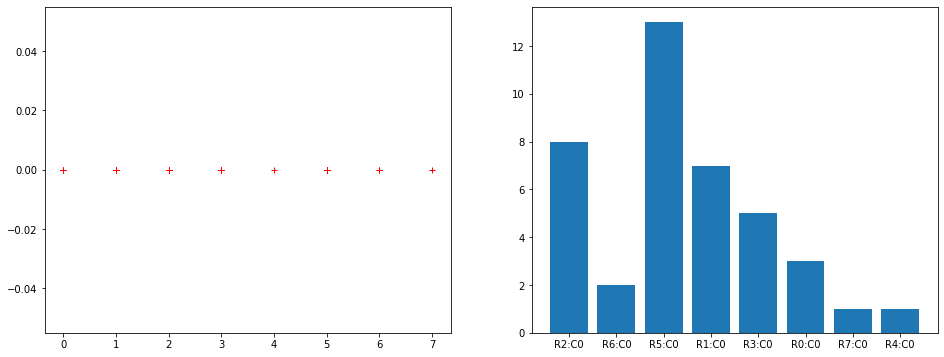

In [ ]:
#—á–∏—Å–ª–æ —Å—Ç—Ä–æ–∫ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏
times_repeat = 40

#—á–∏—Å–ª–æ –±—É–∫–≤–µ–Ω–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤ –≤ —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–æ–∫–µ
num_letters = 7

#—á–∏—Å–ª–æ —Ü–∏—Ñ—Ä–æ–≤—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤ –≤ —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–æ–∫–µ
num_nums = 0

input_arr = []

for i in range(times_repeat):
    s = random_string(num_letters, num_nums)
    res = short_get_optimal_function(s, 'pal')
    input_arr.append(res)

plot_shift_map(input_arr)
